#**Stock  Price Prediction using Kalman Filter**

In [1]:
! pip install yfinance
! pip install pykalman

     |████████████████████████████████| 6.3MB 4.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=5ea85ea4459259fc0a585cb3c4107ecb70d55cf1987899d252f2e3d43d6075b4
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 235kB 3.9MB/s 
  Created wheel for pykalman: filename=pykalman-0.9.5-cp37-none-any.whl size=48464 sha256=18ba830e642c5432a9cbe34b9f678892b948a3240875f1d2ab0403790e6e7e02
  Stored in directory: /root/.cache/pip/wheels/d9/e8/6a/553d9832679cb74a8434fa597c3abdb07313e40054a0adf9ac
Successfully built pykalman


In [2]:
import yfinance as yf
data = yf.download("FB", start="2017-01-01", end="2021-06-13")
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400


In [15]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],    # The value for At. It is a random walk so is set to 1.0
                  observation_matrices = [1],   # The value for Ht.
                  initial_state_mean = 0,       # Any initial value. It will converge to the true state value.
                  initial_state_covariance = 1, # Sigma value for the Qt in Equation (1) the Gaussian distribution
                  observation_covariance=1,     # Sigma value for the Rt in Equation (2) the Gaussian distribution
                  transition_covariance=.01)    # A small turbulence in the random walk parameter 1.0
# Get the Kalman smoothing
state_means, _ = kf.filter(data['Adj Close'].values)

# Call it KF_mean
data['KF_mean'] = np.array(state_means)
data.head()

,Open,High,Low,Close,Adj Close,Volume,KF_mean
Date,,,,,,,
2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900,58.430000
2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900,78.782716
2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200,89.590545
2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300,96.738963
2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400,101.843074


Text(0, 0.5, 'Price')

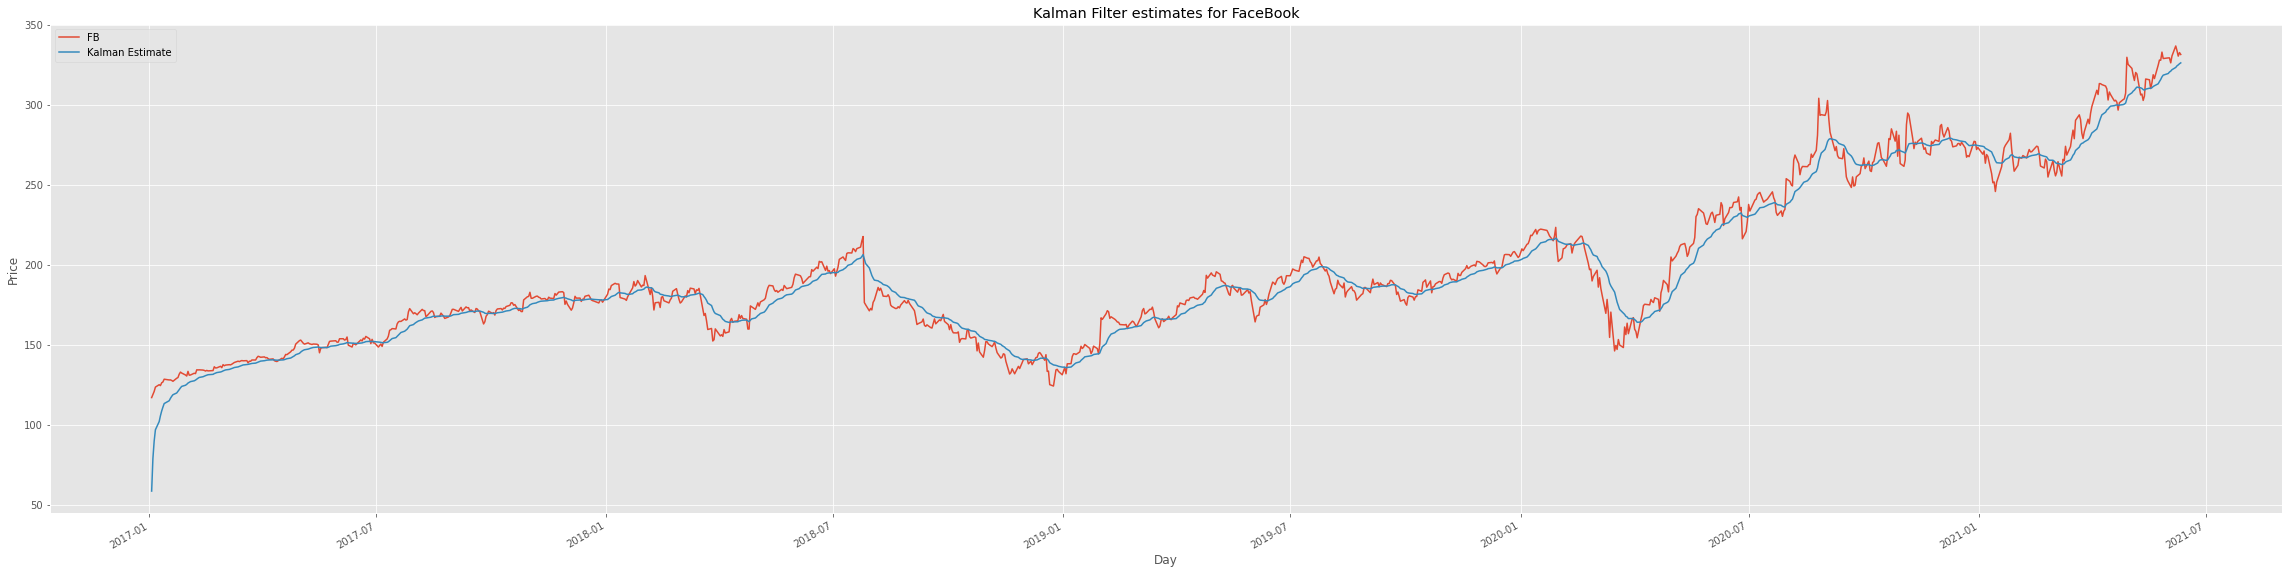

In [25]:
data[['Adj Close','KF_mean']].plot()
plt.title('Kalman Filter estimates for FaceBook')
plt.legend(['FB','Kalman Estimate'])
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Day')
plt.ylabel('Price')